In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
from numpy.linalg import qr
from numpy.random import default_rng
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
from sklearn.metrics import f1_score
import random

In [ ]:
X = pd.read_csv('TCGAdata.txt', sep=" ", header= 0) #files separated by "" and first column=header

y = pd.read_csv('TCGAlabels.txt',header=0, sep=" ",index_col=0)
y=y["x"]
print(X.iloc[:, :3])


print("Number of nulls in features:", sum(X.isnull().sum())) # No nulls
print("Number of nulls in labels:", y.isnull().sum())

            V1        V2        V3
1    -1.168003  1.261756 -1.534537
2    -3.272103 -0.269244 -1.534537
3    -0.861503 -0.189544 -1.534537
4    -0.595803 -0.580044 -1.534537
5     1.336097  0.360556 -1.534537
...        ...       ...       ...
2883 -2.407703 -0.630444 -1.534537
2884  0.626397  0.546456 -1.534537
2885 -0.247003  1.178056 -1.534537
2886 -0.765003 -0.291644 -0.409837
2887 -0.307003  0.471656 -0.101537

[2887 rows x 3 columns]
Number of nulls in features: 0
Number of nulls in labels: 0


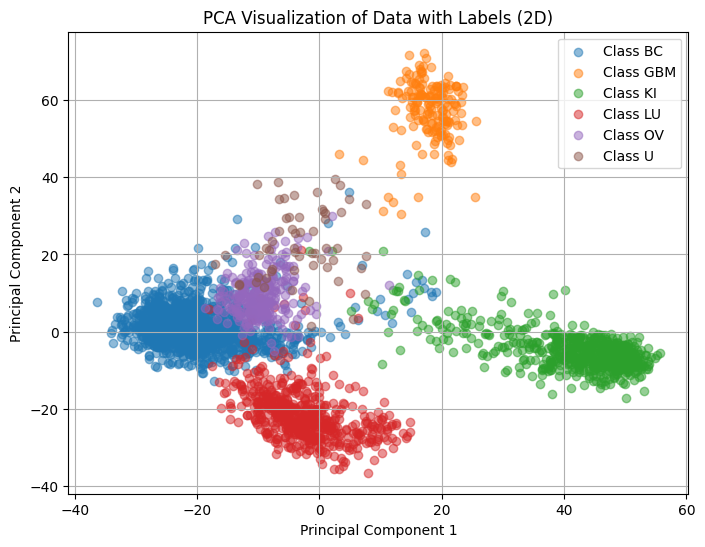

In [ ]:
pca = PCA()

X_pca = pca.fit_transform(X)


plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f'Class {label}', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Data with Labels (2D)')
plt.legend()
plt.grid(True)
plt.show()




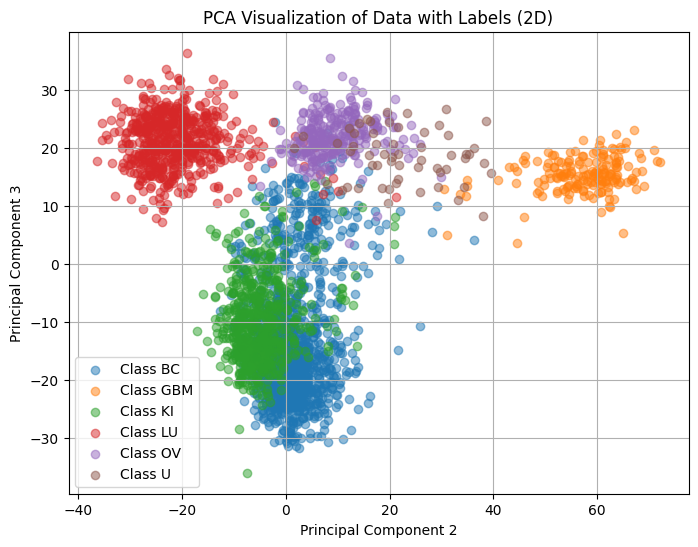

In [ ]:
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 1], X_pca[y == label, 2], label=f'Class {label}', alpha=0.5)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA Visualization of Data with Labels (2D)')
plt.legend()
plt.grid(True)
plt.show()

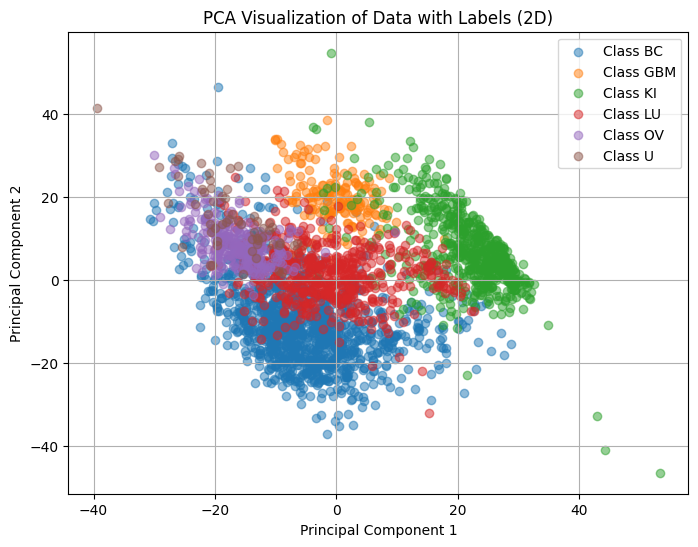

In [ ]:
# Normalize data befor PCA
X_norm = StandardScaler().fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_norm)


plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f'Class {label}', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Data with Labels (2D)')
plt.legend()
plt.grid(True)
plt.show()

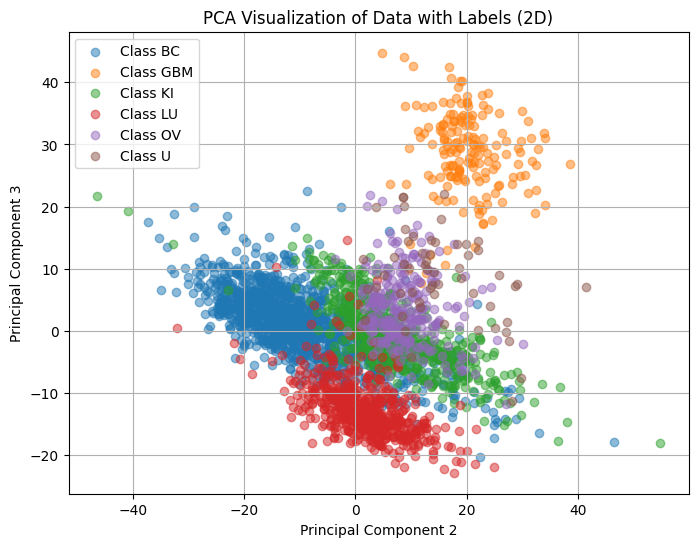

In [ ]:
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 1], X_pca[y == label, 2], label=f'Class {label}', alpha=0.5)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA Visualization of Data with Labels (2D)')
plt.legend()
plt.grid(True)
plt.show()

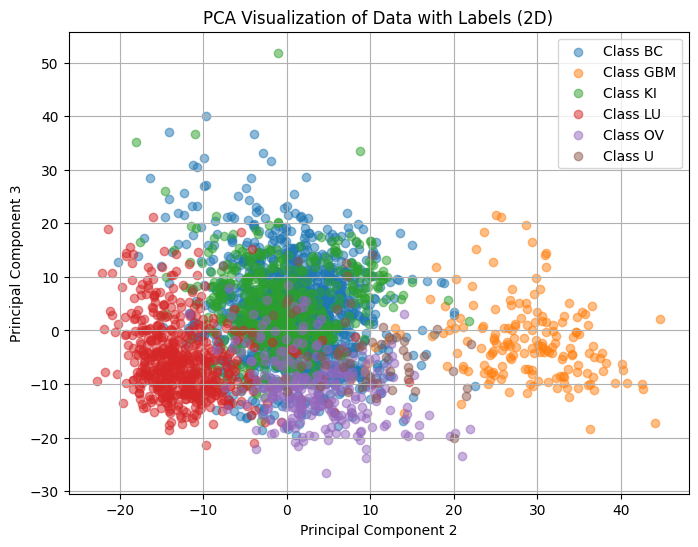

In [ ]:
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 2], X_pca[y == label, 3], label=f'Class {label}', alpha=0.5)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA Visualization of Data with Labels (2D)')
plt.legend()
plt.grid(True)
plt.show()

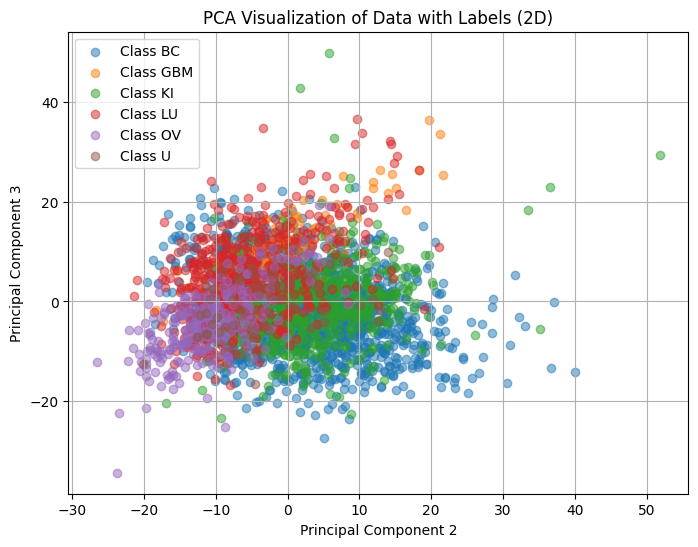

In [ ]:
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 3], X_pca[y == label, 4], label=f'Class {label}', alpha=0.5)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA Visualization of Data with Labels (2D)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Assuming 'data' is your dataset loaded into a NumPy array
# data = np.load('your_data.npy')

# Standardize the data (important for PCA)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Adjust n_components if needed
principal_components = pca.fit_transform(data_standardized)

# Extract the PCA axes
pca_axes = pca.components_

# Plot the original standardized data
plt.scatter(data_standardized[:, 0], data_standardized[:, 1], alpha=0.5)

# Plot the PCA axes as arrows
for i, (comp, var) in enumerate(zip(pca_axes, pca.explained_variance_)):
    start, end = np.zeros(2), comp * np.sqrt(var) * 2  # Scale the arrows
    plt.annotate('', xy=end, xytext=start,
                 arrowprops=dict(facecolor='red', shrink=0.05))

    # You can also label the principal components
    plt.text(end[0], end[1], f'PC{i+1}', fontsize=12, color='red')

# Label the axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA of the dataset')
plt.axis('equal')  # Optional: This makes the scale of the axes equal
plt.grid()

# Show the plot
plt.show()
